# HackerEarth ML - Of Genomes And Genetics

# Step 1: Reading and Understanding the Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use('seaborn-deep')
plt.style.use('fivethirtyeight')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.titlesize'] = 14
plt.rcParams['figure.figsize'] = (12, 8)

pd.options.mode.chained_assignment = None
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 400)
import warnings
warnings.filterwarnings('ignore')
import sklearn.base as skb
import sklearn.metrics as skm
import sklearn.model_selection as skms
import sklearn.preprocessing as skp
import sklearn.utils as sku
import sklearn.linear_model as sklm
import sklearn.neighbors as skn
import sklearn.ensemble as ske
import catboost as cb
import scipy.stats as sstats
import random
seed = 12
np.random.seed(seed)

from datetime import date

In [3]:
!pip install pandas-profiling --quiet
import pandas_profiling as pp

In [4]:
# important funtions
def datasetShape(df):
    rows, cols = df.shape
    print("The dataframe has",rows,"rows and",cols,"columns.")
    
# select numerical and categorical features
def divideFeatures(df):
    numerical_features = df.select_dtypes(include=[np.number])
    categorical_features = df.select_dtypes(include=[np.object])
    return numerical_features, categorical_features

In [5]:
#base = '/kaggle/input/of-genomes-and-genetics-hackerearth-ml/'
data_file = "C:/Users/mohit/OneDrive/Desktop/ML Work/dataset/train.csv"
df = pd.read_csv(data_file)
df.head()

Patient Id  Patient Age Genes in mother's side Inherited from father Maternal gene Paternal gene  Blood cell count (mcL) Patient First Name Family Name Father's name  Mother's age  Father's age                              Institute Name                              Location of Institute    Status Respiratory Rate (breaths/min) Heart Rate (rates/min  Test 1  Test 2  Test 3  Test 4  Test 5  \
0  PID0x6418         2.00                    Yes                    No           Yes            No                    4.76            Richard         NaN         Larre           NaN           NaN  Boston Specialty & Rehabilitation Hospital  55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...     Alive                 Normal (30-60)                Normal    0.00     NaN     NaN    1.00    0.00   
1  PID0x25d5         4.00                    Yes                   Yes            No            No                    4.91               Mike         NaN        Brycen           NaN         23.00           St. Margaret's Hospital For Women  1515 COMMONWEALTH AV\nALLSTON/BRIGHTON, MA 021...  Deceased                      Tachypnea                Normal     NaN    0.00    0.00    1.00    0.00   
2  PID0x4a82         6.00                    Yes                    No            No            No                    4.89           Kimberly         NaN        Nashon         41.00         22.00                                         NaN                                                  -     Alive                 Normal (30-60)           Tachycardia    0.00    0.00    0.00    1.00    0.00   
3  PID0x4ac8        12.00                    Yes                    No           Yes            No                    4.71            Jeffery   Hoelscher        Aayaan         21.00           NaN                                         NaN  55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...  Deceased                      Tachypnea                Normal    0.00    0.00    0.00    1.00    0.00   
4  PID0x1bf7        11.00                    Yes                    No           NaN           Yes                    4.72            Johanna    Stutzman         Suave         32.00           NaN                             Carney Hospital  300 LONGWOOD AV\nFENWAY/KENMORE, MA 02115\n(42...     Alive                      Tachypnea           Tachycardia    0.00    0.00    0.00    1.00    0.00   

  Parental consent Follow-up Gender Birth asphyxia Autopsy shows birth defect (if applicable) Place of birth Folic acid details (peri-conceptional) H/O serious maternal illness H/O radiation exposure (x-ray) H/O substance abuse Assisted conception IVF/ART History of anomalies in previous pregnancies  No. of previous abortion Birth defects  White Blood cell count (thousand per microliter)  \
0              Yes      High    NaN            NaN                             Not applicable      Institute                                     No                          NaN                             No                  No                          No                                          Yes                       NaN           NaN                                              9.86   
1              Yes      High    NaN             No                                       None            NaN                                    Yes                          Yes                 Not applicable      Not applicable                          No                                          Yes                       NaN      Multiple                                              5.52   
2              Yes       Low    NaN      No record                             Not applicable            NaN                                    Yes                           No                            Yes                 NaN                         Yes                                          Yes                      4.00      Singular                                               NaN   
3              Yes      High   Male  Not av

In [6]:
data_file =  "C:/Users/mohit/OneDrive/Desktop/ML Work/dataset/test.csv"
df_test = pd.read_csv(data_file)
df_test.head()

Patient Id  Patient Age Genes in mother's side Inherited from father Maternal gene Paternal gene  Blood cell count (mcL) Patient First Name Family Name Father's name  Mother's age  Father's age                              Institute Name                              Location of Institute    Status Respiratory Rate (breaths/min) Heart Rate (rates/min  Test 1  Test 2  Test 3  Test 4  Test 5  \
0  PID0x4175            6                     No                   Yes            No            No                    4.98            Charles         NaN          Kore            38            61                    St. Elizabeth's Hospital  30 WARREN ST\nALLSTON/BRIGHTON, MA 02134\n(42....     Alive                      Tachypnea                Normal       0     -99       0       1       0   
1  PID0x21f5           10                    Yes                    No           NaN           Yes                    5.12          Catherine         NaN        Homero            33            53                                         -99  249 RIVER ST\nMATTAPAN, MA 02126\n(42.27137912...     Alive                            NaN                   -99       0       0     -99       1     -99   
2  PID0x49b8            5                     No                   NaN            No            No                    4.88              James         NaN       Danield            48            60                                         NaN  1400 VFW Parkway\nWest Roxbury, MA 02132\n(42....  Deceased                            NaN                Normal       0       0       0       1       0   
3  PID0x2d97           13                     No                   Yes           Yes            No                    4.69              Brian         NaN       Orville            25            55  Boston Specialty & Rehabilitation Hospital  51 BLOSSOM ST\nCENTRAL, MA 02114\n(42.36327718...     Alive                            -99                   -99       0       0       0       1       0   
4  PID0x58da            5                     No                   NaN           NaN           Yes                    5.15               Gary         NaN        Issiah            41            38                              Not applicable                                                  -  Deceased                      Tachypnea                   NaN       0       0       0       1       0   

  Parental consent Follow-up     Gender Birth asphyxia Autopsy shows birth defect (if applicable) Place of birth Folic acid details (peri-conceptional) H/O serious maternal illness H/O radiation exposure (x-ray) H/O substance abuse Assisted conception IVF/ART History of anomalies in previous pregnancies  No. of previous abortion Birth defects  White Blood cell count (thousand per microliter)  \
0              -99       Low       Male            Yes                             Not applicable      Institute                                    Yes                           No                            Yes                   -                          No                                          -99                         2      Multiple                                            -99.00   
1              Yes       Low       Male            Yes                             Not applicable            -99                                    Yes                           No                            -99                 -99                          No                                          Yes                       -99      Multiple                                              8.18   
2              -99       Low  Ambiguous  Not available                                        -99      Institute                                     No                          Yes                            Yes                 Yes                         Yes                                           No                         0      Singular                                            -99.00   
3              -99       Lo

In [7]:
# set target feature
targetFeature='Genetic Disorder'
targetFeature2='Disorder Subclass'

In [8]:
# check dataset shape
datasetShape(df)

The dataframe has 22083 rows and 45 columns.


In [9]:
# remove ID from train data
df.drop(['Patient Id'], inplace=True, axis=1)

In [10]:
# check for duplicates
print(df.shape)
df.drop_duplicates(inplace=True)
print(df.shape)

(22083, 44)
(22083, 44)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22083 entries, 0 to 22082
Data columns (total 44 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Age                                       20656 non-null  float64
 1   Genes in mother's side                            22083 non-null  object 
 2   Inherited from father                             21777 non-null  object 
 3   Maternal gene                                     19273 non-null  object 
 4   Paternal gene                                     22083 non-null  object 
 5   Blood cell count (mcL)                            22083 non-null  float64
 6   Patient First Name                                22083 non-null  object 
 7   Family Name                                       12392 non-null  object 
 8   Father's name                                     22083 non-null  object 
 9   Mother's age     

In [12]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9465 entries, 0 to 9464
Data columns (total 43 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Id                                        9465 non-null   object 
 1   Patient Age                                       9465 non-null   int64  
 2   Genes in mother's side                            9465 non-null   object 
 3   Inherited from father                             8914 non-null   object 
 4   Maternal gene                                     5742 non-null   object 
 5   Paternal gene                                     9465 non-null   object 
 6   Blood cell count (mcL)                            9465 non-null   float64
 7   Patient First Name                                9465 non-null   object 
 8   Family Name                                       148 non-null    object 
 9   Father's name      

# Step 2: EDA

In [13]:
# remove irrelevant columns
df.drop(['Patient First Name', 'Family Name', "Father's name", "Father's age", "Mother's age", 'Institute Name', 'Location of Institute', 'Status', 'Parental consent', 'Autopsy shows birth defect (if applicable)', 'Place of birth', 'No. of previous abortion'], axis=1, inplace=True)
df_test.drop(['Patient First Name', 'Family Name', "Father's name", "Father's age", "Mother's age", 'Institute Name', 'Location of Institute', 'Status', 'Parental consent', 'Autopsy shows birth defect (if applicable)', 'Place of birth', 'No. of previous abortion'], axis=1, inplace=True)
df.describe()

Patient Age  Blood cell count (mcL)   Test 1   Test 2   Test 3   Test 4   Test 5  White Blood cell count (thousand per microliter)  Symptom 1  Symptom 2  Symptom 3  Symptom 4  Symptom 5
count     20656.00                22083.00 19956.00 19931.00 19936.00 19943.00 19913.00                                          19935.00   19928.00   19861.00   19982.00   19970.00   19930.00
mean          6.97                    4.90     0.00     0.00     0.00     1.00     0.00                                              7.49       0.59       0.55       0.54       0.50       0.46
std           4.32                    0.20     0.00     0.00     0.00     0.00     0.00                                              2.65       0.49       0.50       0.50       0.50       0.50
min           0.00                    4.09     0.00     0.00     0.00     1.00     0.00                                              3.00       0.00       0.00       0.00       0.00       0.00
25%           3.00                    4.76     0.00     0.00     0.00     1.00     0.00                                              5.42       0.00       0.00       0.00       0.00       0.00
50%           7.00                    4.90     0.00     0.00     0.00     1.00     0.00                                              7.48       1.00       1.00       1.00       0.00       0.00
75%          11.00                    5.03     0.00     0.00     0.00     1.00     0.00                                              9.53       1.00       1.00       1.00       1.00       1.00
max          14.00                    5.61     0.00     0.00     0.00     1.00     0.00                                             12.00       1.00       1.00       1.00       1.00       1.00

In [14]:
cont_features, cat_features = divideFeatures(df)
cat_features.head()

Genes in mother's side Inherited from father Maternal gene Paternal gene Respiratory Rate (breaths/min) Heart Rate (rates/min Follow-up Gender Birth asphyxia Folic acid details (peri-conceptional) H/O serious maternal illness H/O radiation exposure (x-ray) H/O substance abuse Assisted conception IVF/ART History of anomalies in previous pregnancies Birth defects Blood test result  \
0                    Yes                    No           Yes            No                 Normal (30-60)                Normal      High    NaN            NaN                                     No                          NaN                             No                  No                          No                                          Yes           NaN               NaN   
1                    Yes                   Yes            No            No                      Tachypnea                Normal      High    NaN             No                                    Yes                          Yes                 Not applicable      Not applicable                          No                                          Yes      Multiple            normal   
2                    Yes                    No            No            No                 Normal (30-60)           Tachycardia       Low    NaN      No record                                    Yes                           No                            Yes                 NaN                         Yes                                          Yes      Singular            normal   
3                    Yes                    No           Yes            No                      Tachypnea                Normal      High   Male  Not available                                     No                          Yes                              -      Not applicable                         NaN                                          Yes      Singular      inconclusive   
4                    Yes                    No           NaN           Yes                      Tachypnea           Tachycardia       Low   Male  Not available                                     No                          Yes                              -      Not applicable                         Yes                                           No      Multiple               NaN   

                               Genetic Disorder                    Disorder Subclass  
0   Mitochondrial genetic inheritance disorders  Leber's hereditary optic neuropathy  
1                                           NaN                      Cystic fibrosis  
2  Multifactorial genetic inheritance disorders                             Diabetes  
3   Mitochondrial genetic inheritance disorders                       Leigh syndrome  
4  Multifactorial genetic inheritance disorders                               Cancer

### Univariate Analysis

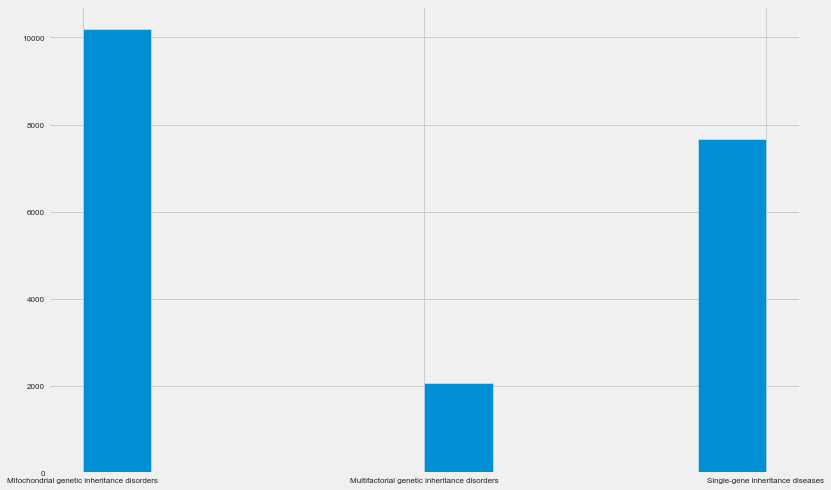

In [15]:
# check target feature distribution
df[targetFeature].hist()
plt.show()

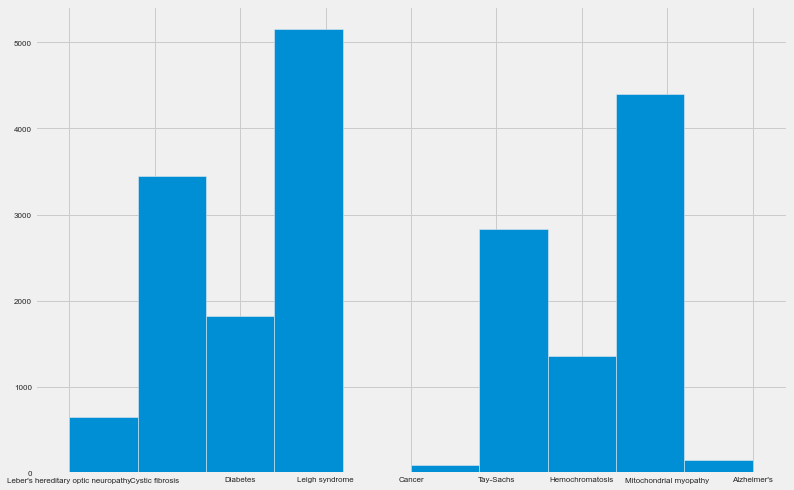

In [16]:
# check target feature distribution
df[targetFeature2].hist()
plt.show()

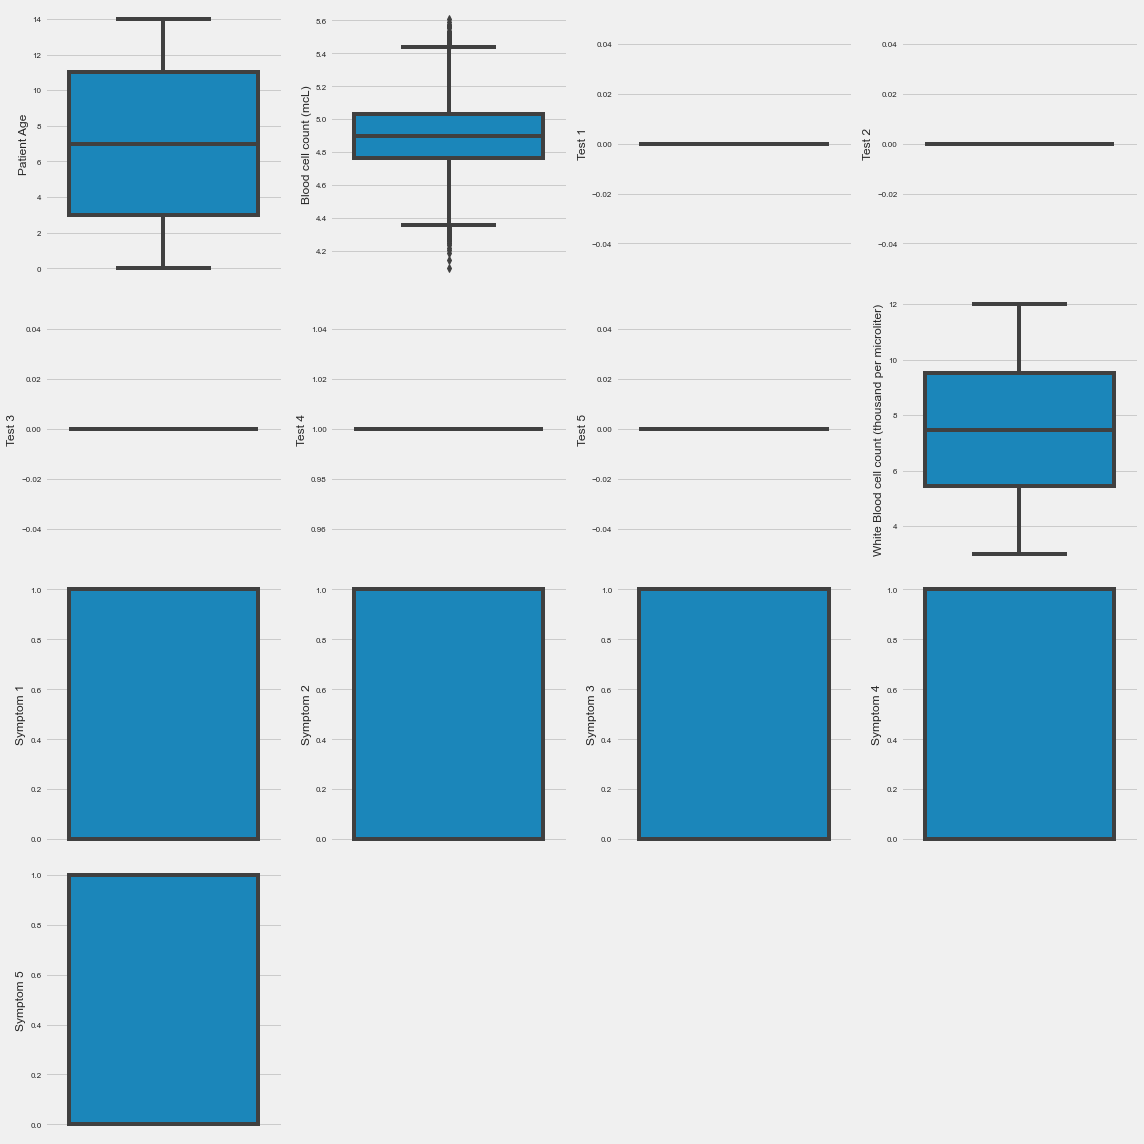

In [17]:
# boxplots of numerical features for outlier detection

fig = plt.figure(figsize=(16,16))
for i in range(len(cont_features.columns)):
    fig.add_subplot(4, 4, i+1)
    sns.boxplot(y=cont_features.iloc[:,i])
plt.tight_layout()
plt.show()

<Figure size 2304x2304 with 0 Axes>

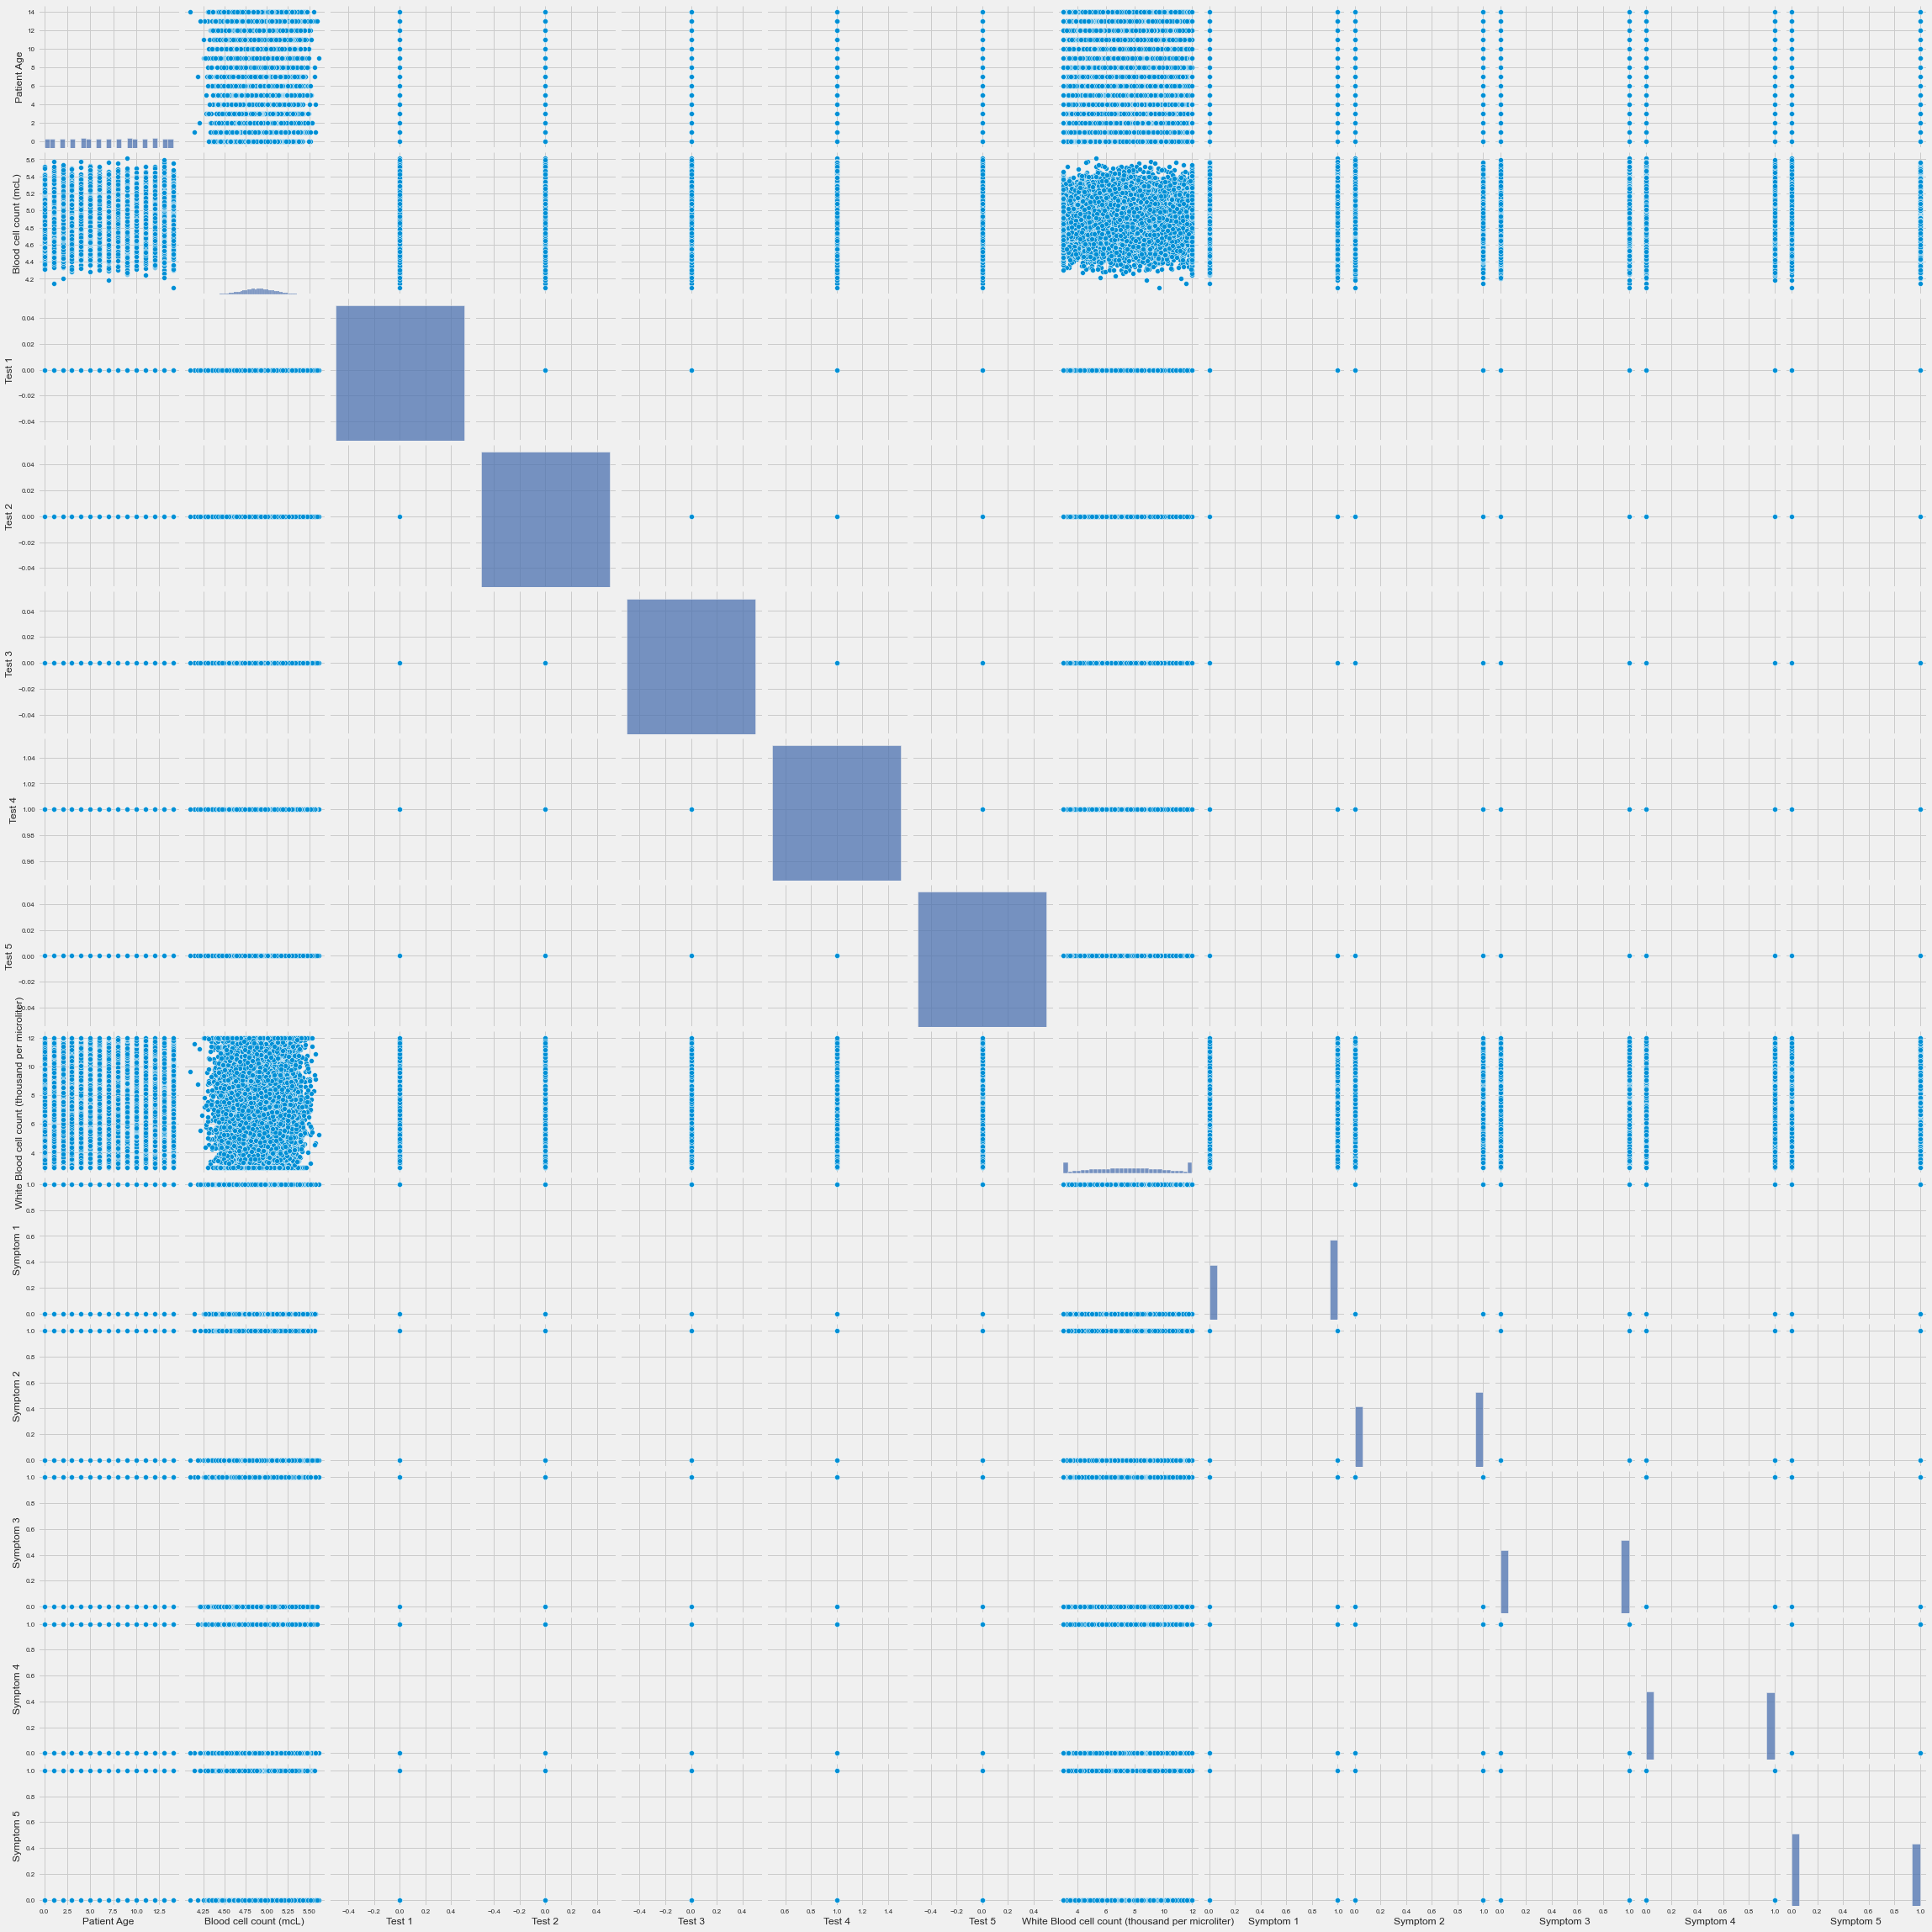

In [18]:
plt.figure(figsize=(32,32))
sns.pairplot(df)
plt.show()

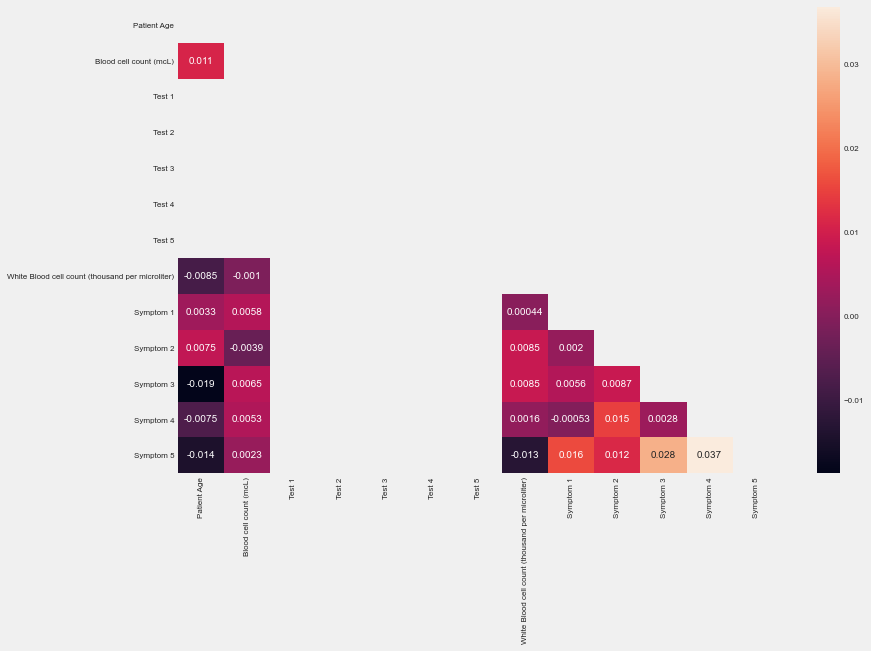

In [19]:
# correlation heatmap for all features
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask = mask, annot=True)
plt.show()

### Profiling for Whole Data

In [20]:
profile = pp.ProfileReport(df, title='Pandas Profiling Report', explorative=True)
profile.to_file("profile.html")

Summarize dataset:   0%|          | 0/45 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [22]:
profile.to_notebook_iframe()

# Step 3: Data Preparation

### Handle Missing

In [23]:
# remove all columns having no values
df.dropna(axis=1, how="all", inplace=True)
df_test.dropna(axis=1, how="all", inplace=True)
df.dropna(axis=0, how="all", inplace=True)

# drop rows where target features are not available
df.dropna(subset=['Genetic Disorder', 'Disorder Subclass'], how='any', inplace=True)
datasetShape(df)

The dataframe has 18047 rows and 32 columns.


In [24]:
# drop single valued column
keep = [c for c in list(df) if df[c].nunique() > 1]
df = df[keep]
keep.remove('Disorder Subclass')
keep.remove('Genetic Disorder')
keep.insert(0, 'Patient Id')
df_test = df_test[keep]
datasetShape(df)

The dataframe has 18047 rows and 27 columns.


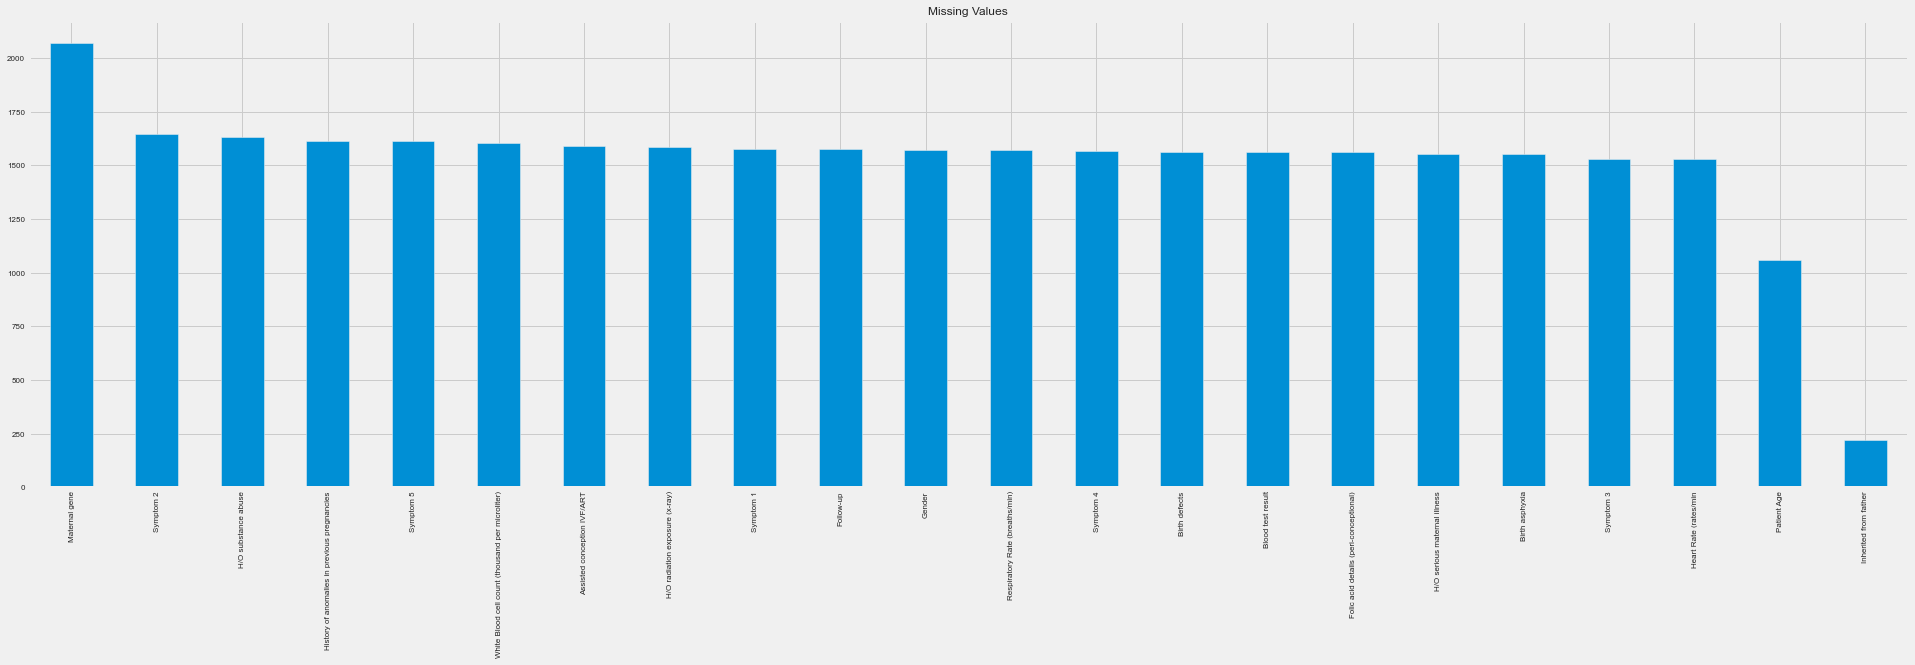

In [25]:
# plot missing values

def calc_missing(df):
    missing = df.isna().sum().sort_values(ascending=False)
    missing = missing[missing != 0]
    missing_perc = missing/df.shape[0]*100
    return missing, missing_perc

if df.isna().any().sum()>0:
    missing, missing_perc = calc_missing(df)
    missing.plot(kind='bar',figsize=(30,8))
    plt.title('Missing Values')
    plt.show()
else:
    print("No Missing Values")

In [26]:
def fillNan(df, col, value):
    df[col].fillna(value, inplace=True)

In [27]:
# setting Assisted conception IVF/ART missing values to Not available
fillNan(df, 'Assisted conception IVF/ART', 'Yes')
fillNan(df_test, 'Assisted conception IVF/ART', 'Yes')
df['Assisted conception IVF/ART'].isna().any()

False

In [28]:
# setting H/O radiation exposure (x-ray) missing values to -
fillNan(df, 'H/O radiation exposure (x-ray)', '-')
fillNan(df_test, 'H/O radiation exposure (x-ray)', '-')
df['H/O radiation exposure (x-ray)'].isna().any()

False

In [29]:
# setting Respiratory Rate (breaths/min) missing values to Normal (30-60)
fillNan(df, 'Respiratory Rate (breaths/min)', 'Normal (30-60)')
fillNan(df_test, 'Respiratory Rate (breaths/min)', 'Normal (30-60)')
df['Respiratory Rate (breaths/min)'].isna().any()

False

In [30]:
# setting Folic acid details (peri-conceptional) missing values to Yes
fillNan(df, 'Folic acid details (peri-conceptional)', 'Yes')
fillNan(df_test, 'Folic acid details (peri-conceptional)', 'Yes')
df['Folic acid details (peri-conceptional)'].isna().any()

False

In [31]:
# setting H/O serious maternal illness missing values to No
fillNan(df, 'H/O serious maternal illness', 'No')
fillNan(df_test, 'H/O serious maternal illness', 'No')
df['H/O serious maternal illness'].isna().any()

False

In [32]:
# setting Birth asphyxia missing values to Not available
fillNan(df, 'Birth asphyxia', 'Not available')
fillNan(df_test, 'Birth asphyxia', 'Not available')
df['Birth asphyxia'].isna().any()

False

In [33]:
# setting Birth defects missing values to Singular
fillNan(df, 'Birth defects', 'Singular')
fillNan(df_test, 'Birth defects', 'Singular')
df['Birth defects'].isna().any()

False

In [34]:
# setting Blood test result missing values to inconclusive
fillNan(df, 'Blood test result', 'inconclusive')
fillNan(df_test, 'Blood test result', 'inconclusive')
df['Blood test result'].isna().any()

False

In [35]:
# setting H/O substance abuse missing values to -
fillNan(df, 'H/O substance abuse', '-')
fillNan(df_test, 'H/O substance abuse', '-')
df['H/O substance abuse'].isna().any()

False

In [36]:
# setting missing values to mean values
fillNan(df, 'White Blood cell count (thousand per microliter)', df['White Blood cell count (thousand per microliter)'].mean())
fillNan(df_test, 'White Blood cell count (thousand per microliter)', df['White Blood cell count (thousand per microliter)'].mean())
df['White Blood cell count (thousand per microliter)'].isna().any()

False

In [37]:
# setting History of anomalies in previous pregnancies missing values to No
fillNan(df, 'History of anomalies in previous pregnancies', 'No')
fillNan(df_test, 'History of anomalies in previous pregnancies', 'No')
df['History of anomalies in previous pregnancies'].isna().any()

False

In [38]:
# setting Inherited from father missing values to No
fillNan(df, 'Inherited from father', 'No')
fillNan(df_test, 'Inherited from father', 'No')
df['Inherited from father'].isna().any()

False

In [39]:
# setting Gender missing values to Ambiguous
fillNan(df, 'Gender', 'Ambiguous')
fillNan(df_test, 'Gender', 'Ambiguous')
df['Gender'].isna().any()

False

In [40]:
# setting Follow-up missing values to Low
fillNan(df, 'Follow-up', 'Low')
fillNan(df_test, 'Follow-up', 'Low')
df['Follow-up'].isna().any()

False

In [41]:
# setting Maternal gene missing values to No
fillNan(df, 'Maternal gene', 'No')
fillNan(df_test, 'Maternal gene', 'No')
df['Maternal gene'].isna().any()

False

In [42]:
# setting missing values to mean values
fillNan(df, 'Patient Age', df['Patient Age'].mean())
fillNan(df_test, 'Patient Age', df['Patient Age'].mean())
df['Patient Age'].isna().any()

False

In [43]:
# setting missing values to most occurring values
fillNan(df, 'Symptom 1', df['Symptom 1'].mode()[0])
fillNan(df_test, 'Symptom 1', df['Symptom 1'].mode()[0])

fillNan(df, 'Symptom 2', df['Symptom 2'].mode()[0])
fillNan(df_test, 'Symptom 2', df['Symptom 2'].mode()[0])

fillNan(df, 'Symptom 3', df['Symptom 3'].mode()[0])
fillNan(df_test, 'Symptom 3', df['Symptom 3'].mode()[0])

fillNan(df, 'Symptom 4', df['Symptom 4'].mode()[0])
fillNan(df_test, 'Symptom 4', df['Symptom 4'].mode()[0])

fillNan(df, 'Symptom 5', df['Symptom 5'].mode()[0])
fillNan(df_test, 'Symptom 5', df['Symptom 5'].mode()[0])
            
fillNan(df, 'Heart Rate (rates/min', df['Heart Rate (rates/min'].mode()[0])
fillNan(df_test, 'Heart Rate (rates/min', df['Heart Rate (rates/min'].mode()[0])

In [44]:
print("Train Missing:",df.isna().any().sum())
print("Test Missing:",df_test.isna().any().sum())

Train Missing: 0
Test Missing: 0


### One-hot Encoding

In [45]:
cont_features, cat_features = divideFeatures(df)
cat_features

Genes in mother's side Inherited from father Maternal gene Paternal gene Respiratory Rate (breaths/min) Heart Rate (rates/min Follow-up     Gender Birth asphyxia Folic acid details (peri-conceptional) H/O serious maternal illness H/O radiation exposure (x-ray) H/O substance abuse Assisted conception IVF/ART History of anomalies in previous pregnancies Birth defects  Blood test result  \
0                        Yes                    No           Yes            No                 Normal (30-60)                Normal      High  Ambiguous  Not available                                     No                           No                             No                  No                          No                                          Yes      Singular       inconclusive   
2                        Yes                    No            No            No                 Normal (30-60)           Tachycardia       Low  Ambiguous      No record                                    Yes                           No                            Yes                   -                         Yes                                          Yes      Singular             normal   
3                        Yes                    No           Yes            No                      Tachypnea                Normal      High       Male  Not available                                     No                          Yes                              -      Not applicable                         Yes                                          Yes      Singular       inconclusive   
4                        Yes                    No            No           Yes                      Tachypnea           Tachycardia       Low       Male  Not available                                     No                          Yes                              -      Not applicable                         Yes                                           No      Multiple       inconclusive   
5                        Yes                    No           Yes            No                 Normal (30-60)                Normal       Low     Female  Not available                                     No                           No                             No                  No                         Yes                                           No      Multiple             normal   
...                      ...                   ...           ...           ...                            ...                   ...       ...        ...            ...                                    ...                          ...                            ...                 ...                         ...                                          ...           ...                ...   
22077                     No                   Yes           Yes           Yes                 Normal (30-60)                Normal       Low  Ambiguous      No record                                    Yes                           No                             No      Not applicable                         Yes                                          Yes      Singular  slightly abnormal   
22078                    Yes                   Yes           Yes            No                 Normal (30-60)           Tachycardia      High     Female             No                                    Yes                           No                 Not applicable                  No                         Yes                                           No      Multiple       inconclusive   
22079                     No                   Yes            No           Yes                 Normal (30-60)                Normal      High  Ambiguous             No                                    Yes                          Yes                             No                   -                         Yes                                           No      Multiple       inconclusive   
22080                    Yes                  

In [46]:
custom_feat = ["Genes in mother's side",
 'Inherited from father',
 'Maternal gene',
 'Paternal gene',
 'Respiratory Rate (breaths/min)',
 'Heart Rate (rates/min',
 'Follow-up',
 'Gender',
 'Birth asphyxia',
 'Folic acid details (peri-conceptional)',
 'H/O serious maternal illness',
 'H/O radiation exposure (x-ray)',
 'H/O substance abuse',
 'Assisted conception IVF/ART',
 'History of anomalies in previous pregnancies',
 'Birth defects',
 'Blood test result']

In [47]:
# extract numerical and categorical for dummy and scaling later
for feat in custom_feat:
    dummyVars = pd.get_dummies(df[feat], drop_first=True, prefix=feat+"_")
    df = pd.concat([df, dummyVars], axis=1)
    df.drop(feat, axis=1, inplace=True)
datasetShape(df)

df.head()

The dataframe has 18047 rows and 36 columns.


Patient Age  Blood cell count (mcL)  White Blood cell count (thousand per microliter)  Symptom 1  Symptom 2  Symptom 3  Symptom 4  Symptom 5                              Genetic Disorder                    Disorder Subclass  Genes in mother's side__Yes  Inherited from father__Yes  Maternal gene__Yes  Paternal gene__Yes  Respiratory Rate (breaths/min)__Tachypnea  \
0         2.00                    4.76                                              9.86       1.00       1.00       1.00       1.00       1.00   Mitochondrial genetic inheritance disorders  Leber's hereditary optic neuropathy                            1                           0                   1                   0                                          0   
2         6.00                    4.89                                              7.48       0.00       1.00       1.00       1.00       1.00  Multifactorial genetic inheritance disorders                             Diabetes                            1                           0                   0                   0                                          0   
3        12.00                    4.71                                              7.92       0.00       0.00       1.00       0.00       0.00   Mitochondrial genetic inheritance disorders                       Leigh syndrome                            1                           0                   1                   0                                          1   
4        11.00                    4.72                                              4.10       0.00       0.00       0.00       0.00       0.00  Multifactorial genetic inheritance disorders                               Cancer                            1                           0                   0                   1                                          1   
5        14.00                    5.10                                             10.27       1.00       0.00       0.00       1.00       0.00              Single-gene inheritance diseases                      Cystic fibrosis                            1                           0                   1                   0                                          0   

   Heart Rate (rates/min__Tachycardia  Follow-up__Low  Gender__Female  Gender__Male  Birth asphyxia__No record  Birth asphyxia__Not available  Birth asphyxia__Yes  Folic acid details (peri-conceptional)__Yes  H/O serious maternal illness__Yes  H/O radiation exposure (x-ray)__No  H/O radiation exposure (x-ray)__Not applicable  H/O radiation exposure (x-ray)__Yes  H/O substance abuse__No  \
0                                   0               0               0             0                          0                              1                    0                                            0                                  0                                   1                                               0                                    0                        1   
2                                   1               1               0             0                          1                              0                    0                                            1                                  0                                   0                                               0                                    1                        0   
3                                   0               0               0             1                          0                              1                    0                                            0                                  1                                   0                                               0                                    0                        0   
4                                   1               1               0             1                          0                              1                    0                                            0       

In [48]:
# extract numerical and categorical for dummy and scaling later
for feat in custom_feat:
    dummyVars = pd.get_dummies(df_test[feat], drop_first=True, prefix=feat+"_")
    df_test = pd.concat([df_test, dummyVars], axis=1)
    df_test.drop(feat, axis=1, inplace=True)
datasetShape(df_test)

df_test.head()

The dataframe has 9465 rows and 48 columns.


Patient Id  Patient Age  Blood cell count (mcL)  White Blood cell count (thousand per microliter)  Symptom 1  Symptom 2  Symptom 3  Symptom 4  Symptom 5  Genes in mother's side__Yes  Inherited from father__Yes  Maternal gene__Yes  Paternal gene__Yes  Respiratory Rate (breaths/min)__Normal (30-60)  Respiratory Rate (breaths/min)__Tachypnea  Heart Rate (rates/min__Normal  \
0  PID0x4175            6                    4.98                                            -99.00       True       True       True       True       True                            0                           1                   0                   0                                               0                                          1                              1   
1  PID0x21f5           10                    5.12                                              8.18      False      False      False       True      False                            1                           0                   0                   1                                               1                                          0                              0   
2  PID0x49b8            5                    4.88                                            -99.00      False      False       True       True      False                            0                           0                   0                   0                                               1                                          0                              1   
3  PID0x2d97           13                    4.69                                              6.88       True      False       True      False       True                            0                           1                   1                   0                                               0                                          0                              0   
4  PID0x58da            5                    5.15                                              6.20       True       True       True       True      False                            0                           0                   0                   1                                               0                                          1                              1   

   Heart Rate (rates/min__Tachycardia  Follow-up__High  Follow-up__Low  Gender__Ambiguous  Gender__Female  Gender__Male  Birth asphyxia__No  Birth asphyxia__No record  Birth asphyxia__Not available  Birth asphyxia__Yes  Folic acid details (peri-conceptional)__No  Folic acid details (peri-conceptional)__Yes  H/O serious maternal illness__No  H/O serious maternal illness__Yes  \
0                                   0                0               1                  0               0             1                   0                          0                              0                    1                                           0                                            1                                 1                                  0   
1                                   0                0               1                  0               0             1                   0                          0                              0                    1                                           0                                            1                                 1                                  0   
2                                   0                0               1                  1               0             0                   0                          0                              1                    0                                           1                                            0                                 0                                  1   
3                                   0                0               1                  1               0             0                   1                          0                              0                    0 

# Step 4: Data Modelling

### Split Train-Test Data

In [49]:
# helper functions

def printScore(y_train, y_train_pred):
    print(skm.f1_score(y_train, y_train_pred, average="macro"))

In [50]:
df_f1 = df.sample(frac=1, random_state=seed).reset_index(drop=True)
df_f2 = df.sample(frac=1, random_state=seed).reset_index(drop=True)

In [51]:
# remove Disorder Subclass from df1
df_f1.drop('Disorder Subclass', inplace=True, axis=1)

# convert Genetic Disorder to one-hot
# dummyVars = pd.get_dummies(df_f2['Genetic Disorder'], drop_first=True, prefix="GeneticDisorder_")
# df_f2 = pd.concat([df_f2, dummyVars], axis=1)
# df_f2.drop('Genetic Disorder', axis=1, inplace=True)

# convert Genetic Disorder to label-encoding
gdle = skp.LabelEncoder()
df_f2['Genetic Disorder'] = gdle.fit_transform(df_f2['Genetic Disorder'])

In [52]:
# shuffle samples
df_f1_shuffle = df_f1.sample(frac=1, random_state=seed).reset_index(drop=True)
df_f2_shuffle = df_f2.sample(frac=1, random_state=seed).reset_index(drop=True)

# separate target feature
df_f1_y = df_f1_shuffle.pop(targetFeature)
df_f1_X = df_f1_shuffle

# transform the text label to integers
f1_le = skp.LabelEncoder()
df_f1_y = f1_le.fit_transform(df_f1_y)
# print(f1_le.classes_)

# split into train dev and test
X_f1_train, X_f1_test, y_f1_train, y_f1_test = skms.train_test_split(df_f1_X, df_f1_y, train_size=0.8, random_state=seed)
print(f"Train set has {X_f1_train.shape[0]} records out of {len(df_f1_shuffle)} which is {round(X_f1_train.shape[0]/len(df_f1_shuffle)*100)}%")
print(f"Test set has {X_f1_test.shape[0]} records out of {len(df_f1_shuffle)} which is {round(X_f1_test.shape[0]/len(df_f1_shuffle)*100)}%")

# separate target feature
df_f2_y = df_f2_shuffle.pop(targetFeature2)
df_f2_X = df_f2_shuffle

# transform the text label to integers
f2_le = skp.LabelEncoder()
df_f2_y = f2_le.fit_transform(df_f2_y)
# print(f2_le.classes_)

# split into train dev and test
X_f2_train, X_f2_test, y_f2_train, y_f2_test = skms.train_test_split(df_f2_X, df_f2_y, train_size=0.8, random_state=seed)
print(f"Train set has {X_f2_train.shape[0]} records out of {len(df_f2_shuffle)} which is {round(X_f2_train.shape[0]/len(df_f2_shuffle)*100)}%")
print(f"Test set has {X_f2_test.shape[0]} records out of {len(df_f2_shuffle)} which is {round(X_f2_test.shape[0]/len(df_f2_shuffle)*100)}%")

Train set has 14437 records out of 18047 which is 80%
Test set has 3610 records out of 18047 which is 20%
Train set has 14437 records out of 18047 which is 80%
Test set has 3610 records out of 18047 which is 20%


### Feature Scaling

In [53]:
# reset index for X_train and X_test
X_f1_train.reset_index(drop=True, inplace=True)
X_f1_test.reset_index(drop=True, inplace=True)
X_f1_train.index[:5]

RangeIndex(start=0, stop=5, step=1)

In [54]:
# reset index for X_train and X_test
X_f2_train.reset_index(drop=True, inplace=True)
X_f2_test.reset_index(drop=True, inplace=True)
X_f2_train.index[:5]

RangeIndex(start=0, stop=5, step=1)

In [55]:
# scaler = skp.RobustScaler()
# scaler = skp.MinMaxScaler()
scaler = skp.StandardScaler()

# apply scaling to all numerical variables except dummy variables as they are already between 0 and 1
X_f1_train[cont_features.columns] = pd.DataFrame(scaler.fit_transform(X_f1_train[cont_features.columns]), columns=cont_features.columns)

# scale test data with transform()
X_f1_test[cont_features.columns] = pd.DataFrame(scaler.transform(X_f1_test[cont_features.columns]), columns=cont_features.columns)

# view sample data
X_f1_train.describe()

Patient Age  Blood cell count (mcL)  White Blood cell count (thousand per microliter)  Symptom 1  Symptom 2  Symptom 3  Symptom 4  Symptom 5  Genes in mother's side__Yes  Inherited from father__Yes  Maternal gene__Yes  Paternal gene__Yes  Respiratory Rate (breaths/min)__Tachypnea  Heart Rate (rates/min__Tachycardia  Follow-up__Low  Gender__Female  Gender__Male  Birth asphyxia__No record  \
count     14437.00                14437.00                                          14437.00   14437.00   14437.00   14437.00   14437.00   14437.00                     14437.00                    14437.00            14437.00            14437.00                                   14437.00                            14437.00        14437.00        14437.00      14437.00                   14437.00   
mean         -0.00                   -0.00                                              0.00       0.00      -0.00      -0.00      -0.00      -0.00                         0.59                        0.39                0.48                0.43                                       0.46                                0.45            0.55            0.30          0.31                       0.23   
std           1.00                    1.00                                              1.00       1.00       1.00       1.00       1.00       1.00                         0.49                        0.49                0.50                0.50                                       0.50                                0.50            0.50            0.46          0.46                       0.42   
min          -1.66                   -3.79                                             -1.77      -1.29      -1.20      -1.17      -0.92      -0.86                         0.00                        0.00                0.00                0.00                                       0.00                                0.00            0.00            0.00          0.00                       0.00   
25%          -0.95                   -0.68                                             -0.73      -1.29      -1.20      -1.17      -0.92      -0.86                         0.00                        0.00                0.00                0.00                                       0.00                                0.00            0.00            0.00          0.00                       0.00   
50%          -0.00                    0.01                                              0.00       0.77       0.83       0.85      -0.92      -0.86                         1.00                        0.00                0.00                0.00                                       0.00                                0.00            1.00            0.00          0.00                       0.00   
75%           0.73                    0.67                                              0.71       0.77       0.83       0.85       1.09       1.16                         1.00                        1.00                1.00                1.00                                       1.00                                1.00            1.00            1.00          1.00                       0.00   
max           1.68                    3.58                                              1.79       0.77       0.83       0.85       1.09       1.16                         1.00                        1.00                1.00                1.00                                       1.00                                1.00            1.00            1.00          1.00                       1.00   

       Birth asphyxia__Not available  Birth asphyxia__Yes  Folic acid details (peri-conceptional)__Yes  H/O serious maternal illness__Yes  H/O radiation exposure (x-ray)__No  H/O radiation exposure (x-ray)__Not applicable  H/O radiation exposure (x-ray)__Yes  H/O substance abuse__No  H/O substance abuse__Not applicable  H/O substance abuse__Yes  Assisted conception IVF/ART__Yes  \
count                 

In [56]:
# scaler = skp.RobustScaler()
# scaler = skp.MinMaxScaler()
scaler = skp.StandardScaler()

# apply scaling to all numerical variables except dummy variables as they are already between 0 and 1
X_f2_train[cont_features.columns] = pd.DataFrame(scaler.fit_transform(X_f2_train[cont_features.columns]), columns=cont_features.columns)

# scale test data with transform()
X_f2_test[cont_features.columns] = pd.DataFrame(scaler.transform(X_f2_test[cont_features.columns]), columns=cont_features.columns)

# view sample data
X_f2_train.describe()

Patient Age  Blood cell count (mcL)  White Blood cell count (thousand per microliter)  Symptom 1  Symptom 2  Symptom 3  Symptom 4  Symptom 5  Genetic Disorder  Genes in mother's side__Yes  Inherited from father__Yes  Maternal gene__Yes  Paternal gene__Yes  Respiratory Rate (breaths/min)__Tachypnea  Heart Rate (rates/min__Tachycardia  Follow-up__Low  Gender__Female  Gender__Male  \
count     14437.00                14437.00                                          14437.00   14437.00   14437.00   14437.00   14437.00   14437.00          14437.00                     14437.00                    14437.00            14437.00            14437.00                                   14437.00                            14437.00        14437.00        14437.00      14437.00   
mean         -0.00                   -0.00                                              0.00       0.00      -0.00      -0.00      -0.00      -0.00              0.87                         0.59                        0.39                0.48                0.43                                       0.46                                0.45            0.55            0.30          0.31   
std           1.00                    1.00                                              1.00       1.00       1.00       1.00       1.00       1.00              0.94                         0.49                        0.49                0.50                0.50                                       0.50                                0.50            0.50            0.46          0.46   
min          -1.66                   -3.79                                             -1.77      -1.29      -1.20      -1.17      -0.92      -0.86              0.00                         0.00                        0.00                0.00                0.00                                       0.00                                0.00            0.00            0.00          0.00   
25%          -0.95                   -0.68                                             -0.73      -1.29      -1.20      -1.17      -0.92      -0.86              0.00                         0.00                        0.00                0.00                0.00                                       0.00                                0.00            0.00            0.00          0.00   
50%          -0.00                    0.01                                              0.00       0.77       0.83       0.85      -0.92      -0.86              0.00                         1.00                        0.00                0.00                0.00                                       0.00                                0.00            1.00            0.00          0.00   
75%           0.73                    0.67                                              0.71       0.77       0.83       0.85       1.09       1.16              2.00                         1.00                        1.00                1.00                1.00                                       1.00                                1.00            1.00            1.00          1.00   
max           1.68                    3.58                                              1.79       0.77       0.83       0.85       1.09       1.16              2.00                         1.00                        1.00                1.00                1.00                                       1.00                                1.00            1.00            1.00          1.00   

       Birth asphyxia__No record  Birth asphyxia__Not available  Birth asphyxia__Yes  Folic acid details (peri-conceptional)__Yes  H/O serious maternal illness__Yes  H/O radiation exposure (x-ray)__No  H/O radiation exposure (x-ray)__Not applicable  H/O radiation exposure (x-ray)__Yes  H/O substance abuse__No  H/O substance abuse__Not applicable  H/O substance abuse__Yes  \
count                   14437.00                       14437.00             14437.00                          

## Model Building

In [57]:
class_weights_f1 = sku.class_weight.compute_class_weight('balanced', np.unique(y_f1_train), y_f1_train)
class_weights_f1 = dict(enumerate(class_weights_f1))
class_weights_f1

{0: 0.6475152493720847, 1: 3.1912024756852344, 2: 0.8754472136316779}

In [58]:
class_weights_f2 = sku.class_weight.compute_class_weight('balanced', np.unique(y_f2_train), y_f2_train)
class_weights_f2 = dict(enumerate(class_weights_f2))
class_weights_f2

{0: 16.20314253647587,
 1: 23.58986928104575,
 2: 0.643446093506262,
 3: 1.1962051536995608,
 4: 1.670949074074074,
 5: 3.362916375494992,
 6: 0.42925103321142927,
 7: 0.49848076790276913,
 8: 0.7847901717764731}

In [59]:
sample_weights_f1 = sku.class_weight.compute_sample_weight('balanced', y_f1_train)
sample_weights_f1

array([0.87544721, 0.64751525, 3.19120248, ..., 0.64751525, 0.87544721,
       0.87544721])

In [60]:
sample_weights_f2 = sku.class_weight.compute_sample_weight('balanced', y_f2_train)
sample_weights_f2

array([1.67094907, 0.42925103, 1.19620515, ..., 0.49848077, 1.67094907,
       0.78479017])

### CatBoost

In [61]:
import catboost as cb

cat_model_f1 = cb.CatBoostClassifier(verbose=0, iterations=70, 
#                                   eval_metric='F1', 
                                  class_weights=class_weights_f1, 
#                                   use_best_model=True
                                 )
cat_model_f1.fit(X_f1_train, y_f1_train, eval_set=(X_f1_test, y_f1_test))
print(cat_model_f1.best_score_)

y_f1_train_pred = cat_model_f1.predict(X_f1_train)
y_f1_test_pred = cat_model_f1.predict(X_f1_test)
print(skm.accuracy_score(y_f1_train, y_f1_train_pred))
print(skm.accuracy_score(y_f1_test, y_f1_test_pred))
printScore(y_f1_train, y_f1_train_pred)
printScore(y_f1_test, y_f1_test_pred)

{'learn': {'MultiClass': 0.7030899784202859}, 'validation': {'MultiClass': 0.8548010478859341}}
0.6080903234744061
0.5725761772853185
0.5708805573719123
0.5320166535903269


In [62]:
import catboost as cb

cat_model_f2 = cb.CatBoostClassifier(verbose=0, iterations=80, 
#                                   eval_metric='F1', 
                                  class_weights=class_weights_f2, 
#                                   use_best_model=True
                                 )
cat_model_f2.fit(X_f2_train, y_f2_train, eval_set=(X_f2_test, y_f2_test))
print(cat_model_f2.best_score_)

y_f2_train_pred = cat_model_f2.predict(X_f2_train)
y_f2_test_pred = cat_model_f2.predict(X_f2_test)
print(skm.accuracy_score(y_f2_train, y_f2_train_pred))
print(skm.accuracy_score(y_f2_test, y_f2_test_pred))
printScore(y_f2_train, y_f2_train_pred)
printScore(y_f2_test, y_f2_test_pred)

{'learn': {'MultiClass': 0.3286444459177867}, 'validation': {'MultiClass': 0.5581304608857217}}
0.705409711158828
0.6867036011080332
0.709392027264841
0.6989664723223934


### RandomForest

In [63]:
rf_model_f1 = ske.RandomForestClassifier(verbose=0, random_state=1, n_jobs=-1, class_weight='balanced_subsample',
                                 n_estimators=100,max_depth=10, 
                                 min_samples_split = 5, min_samples_leaf = 3
                                )
rf_model_f1.fit(X_f1_train, y_f1_train)

# predict
y_f1_train_pred = rf_model_f1.predict(X_f1_train)
y_f1_test_pred = rf_model_f1.predict(X_f1_test)
print(skm.accuracy_score(y_f1_train, y_f1_train_pred))
print(skm.accuracy_score(y_f1_test, y_f1_test_pred))
printScore(y_f1_train, y_f1_train_pred)
printScore(y_f1_test, y_f1_test_pred)

0.7795940984969176
0.5783933518005541
0.7372518890541794
0.5266002386655272


In [64]:
rf_model_f2 = ske.RandomForestClassifier(verbose=0, random_state=1, n_jobs=-1, class_weight='balanced_subsample',
                                 n_estimators=300,max_depth=10, 
                                 min_samples_split = 10, min_samples_leaf = 5
                                )
rf_model_f2.fit(X_f2_train, y_f2_train)

# predict
y_f2_train_pred = rf_model_f2.predict(X_f2_train)
y_f2_test_pred = rf_model_f2.predict(X_f2_test)
print(skm.accuracy_score(y_f2_train, y_f2_train_pred))
print(skm.accuracy_score(y_f2_test, y_f2_test_pred))
printScore(y_f2_train, y_f2_train_pred)
printScore(y_f2_test, y_f2_test_pred)

0.8734501627762
0.695567867036011
0.8900894582737836
0.7006547270271327


### XGBoost

In [66]:
import xgboost as xg

In [64]:
# # Grid used for parameter tuning
# param_test1 = {
#     'max_depth': np.arange(5, 12, 2),
#     'learning_rate': np.arange(0.04, 0.07, 0.01)
# }
# xgb_cv1 = skms.GridSearchCV(estimator = xg.XGBClassifier(n_estimators=100, objective='macro', nthread=4, seed=seed), 
#                              param_grid = param_test1, scoring='f1', n_jobs=4, 
#                              cv=3, verbose=1)
# xgb_cv1.fit(X_f1_train, y_f1_train)
# print(xgb_cv1.best_params_, xgb_cv1.best_score_)
# # max_depth = 10
# # learning_rate = 0.04

In [65]:
# # Grid used for parameter tuning
# param_test2 = {
#  'subsample': np.arange(0.5, 1, 0.1),
#  'min_child_weight': range(1, 6, 1)
# }
# xgb_cv2 = skms.GridSearchCV(estimator = xg.XGBClassifier(n_estimators=500, max_depth = 10, 
#                                                      objective= 'multi:softprob', nthread=4, seed=seed), 
#                             param_grid = param_test2, scoring='f1', n_jobs=4,
#                             cv=5, verbose=1)
# xgb_cv2.fit(X_train_small, y_train_small)
# print(xgb_cv2.best_params_, xgb_cv2.best_score_)
# print(xgb_cv2.best_estimator_)
# # subsample = 0.5
# # min_child_weight = 2

In [67]:
xgb_model_f1 = xg.XGBClassifier(objective ='multi:softprob', random_state=seed, scoring='f1', 
                             learning_rate=0.0001, subsample=0.5, n_jobs=-1, sample_weight=sample_weights_f1,
                             n_estimators=100, max_depth = 8)
xgb_model_f1.fit(X_f1_train, y_f1_train)

# predict
y_f1_train_pred = xgb_model_f1.predict(X_f1_train)
y_f1_test_pred = xgb_model_f1.predict(X_f1_test)
print(skm.accuracy_score(y_f1_train, y_f1_train_pred))
print(skm.accuracy_score(y_f1_test, y_f1_test_pred))
printScore(y_f1_train, y_f1_train_pred)
printScore(y_f1_test, y_f1_test_pred)

[10:25:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "sample_weight", "scoring" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:25:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.6836600401745515
0.6016620498614959
0.6348563477132148
0.5273160057747213


In [68]:
xgb_model_f2 = xg.XGBClassifier(objective ='multi:softprob', random_state=seed, scoring='f1', 
                             learning_rate=0.15, subsample=1, n_jobs=-1, sample_weight=sample_weights_f2,
                             n_estimators=100, max_depth = 5)
xgb_model_f2.fit(X_f2_train, y_f2_train)

# predict
y_f2_train_pred = xgb_model_f2.predict(X_f2_train)
y_f2_test_pred = xgb_model_f2.predict(X_f2_test)
print(skm.accuracy_score(y_f2_train, y_f2_train_pred))
print(skm.accuracy_score(y_f2_test, y_f2_test_pred))
printScore(y_f2_train, y_f2_train_pred)
printScore(y_f2_test, y_f2_test_pred)

[10:25:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "sample_weight", "scoring" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:25:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8346609406386368
0.7210526315789474
0.8454123337067883
0.674210968255123


### LightGBM

In [69]:
import lightgbm as lgb
lgb_model_f1 = lgb.LGBMClassifier(objective='multi', random_state=1, n_jobs=-1, 
                               class_weight=class_weights_f1,
                               learning_rate=0.1, n_estimators=70)
lgb_model_f1.fit(X_f1_train, y_f1_train)

# predict
y_f1_train_pred = lgb_model_f1.predict(X_f1_train)
y_f1_test_pred = lgb_model_f1.predict(X_f1_test)
print(skm.accuracy_score(y_f1_train, y_f1_train_pred))
print(skm.accuracy_score(y_f1_test, y_f1_test_pred))
printScore(y_f1_train, y_f1_train_pred)
printScore(y_f1_test, y_f1_test_pred)

0.6655814919997229
0.5609418282548476
0.6309314279216373
0.5238026709691296


In [70]:
import lightgbm as lgb
lgb_model_f2 = lgb.LGBMClassifier(objective='multi', random_state=1, n_jobs=-1, 
#                                class_weight=class_weights_f2,
                               learning_rate=0.08, n_estimators=100)
lgb_model_f2.fit(X_f2_train, y_f2_train)

# predict
y_f2_train_pred = lgb_model_f2.predict(X_f2_train)
y_f2_test_pred = lgb_model_f2.predict(X_f2_test)
print(skm.accuracy_score(y_f2_train, y_f2_train_pred))
print(skm.accuracy_score(y_f2_test, y_f2_test_pred))
printScore(y_f2_train, y_f2_train_pred)
printScore(y_f2_test, y_f2_test_pred)

0.9303871995566946
0.7074792243767313
0.9607028474085548
0.6908662322967847


# Step 5: Test Evaluation & Submission

In [71]:
# Generate Ensembles

def rmse_cv(model):
    '''
    Use this function to get quickly the rmse score over a cv
    '''
    rmse = np.sqrt(-skms.cross_val_score(model, X_train, y_train, 
                                         scoring="neg_mean_squared_error", cv = 5, n_jobs=-1))
    return rmse

class MixModel(skb.BaseEstimator, skb.RegressorMixin, skb.TransformerMixin):
    '''
    Here we will get a set of models as parameter already trained and 
    will calculate the mean of the predictions for using each model predictions
    '''
    def __init__(self, algs):
        self.algs = algs

    # Define clones of parameters models
    def fit(self, X, y):
        self.algs_ = [skb.clone(x) for x in self.algs]
        
        # Train cloned base models
        for alg in self.algs_:
            alg.fit(X, y)

        return self
    
    # Average predictions of all cloned models
    def predict(self, X):
        predictions = np.column_stack([
            stacked_model.predict(X) for stacked_model in self.algs_
        ])
        return np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=1, arr=predictions)

In [72]:
mixed_model_f1 = MixModel(algs = [
    cat_model_f1,
    rf_model_f1,
    xgb_model_f1,
    lgb_model_f1
])
# score = rmse_cv(mixed_model)
# print("\nAveraged base algs score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

mixed_model_f1.fit(X_f1_train, y_f1_train)

# predict
y_f1_train_pred = mixed_model_f1.predict(X_f1_train)
y_f1_test_pred = mixed_model_f1.predict(X_f1_test)
printScore(y_f1_train, y_f1_train_pred)
printScore(y_f1_test, y_f1_test_pred)

[10:25:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "sample_weight", "scoring" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:25:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.659914738073216
0.5309632237215843


In [72]:
mixed_model_f2 = MixModel(algs = [
#     cat_model_f2,
    rf_model_f2,
#     xgb_model_f2,
#     lgb_model_f2
])
# score = rmse_cv(mixed_model)
# print("\nAveraged base algs score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

mixed_model_f2.fit(X_f2_train, y_f2_train)

# predict
y_f2_train_pred = mixed_model_f2.predict(X_f2_train)
y_f2_test_pred = mixed_model_f2.predict(X_f2_test)
printScore(y_f2_train, y_f2_train_pred)
printScore(y_f2_test, y_f2_test_pred)

0.8900894582737836
0.7006547270271327


In [73]:
# generate test results for targetFeature
def getTestResults():
    df_final_f1 = df_f1.sample(frac=1, random_state=1).reset_index(drop=True)
    test_cols_f1 = [x for x in df_final_f1.columns if targetFeature not in x]
    df_final_test_f1 = df_test[test_cols_f1]
    df_y_f1 = df_final_f1.pop(targetFeature)
    df_X_f1 = df_final_f1
    
    df_y_f1 = f1_le.transform(df_y_f1)

    scaler_f1 = skp.RobustScaler()
#     scaler = skp.MinMaxScaler()
#     scaler = skp.StandardScaler()

    df_X_f1[cont_features.columns] = pd.DataFrame(scaler.fit_transform(df_X_f1[cont_features.columns]), columns=cont_features.columns)
    df_final_test_f1[cont_features.columns] = pd.DataFrame(scaler.transform(df_final_test_f1[cont_features.columns]), columns=cont_features.columns)

#     sample_weights_f1 = sku.class_weight.compute_sample_weight('balanced', df_y_f1)
    
    model_f1 = MixModel(algs = [
#         cat_model_f1,
#         rf_model_f1,
        xgb_model_f1,
#         lgb_model_f1
    ])

    model_f1.fit(df_X_f1, df_y_f1)

    # predict
    y_train_pred_f1 = model_f1.predict(df_X_f1)
    y_test_pred_f1 = model_f1.predict(df_final_test_f1)
    print("Accuracy Score for Train:",skm.accuracy_score(df_y_f1, y_train_pred_f1))
    printScore(df_y_f1, y_train_pred_f1)
    return y_test_pred_f1

# ML models
results = getTestResults()

[10:25:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "sample_weight", "scoring" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:25:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score for Train: 0.6685321660109713
0.6184466573441342


In [74]:
submission = pd.DataFrame({
    'Patient Id': df_test['Patient Id'],
    targetFeature: f1_le.inverse_transform(results.ravel()),
})
print(submission[targetFeature].value_counts())

Mitochondrial genetic inheritance disorders     5689
Single-gene inheritance diseases                2159
Multifactorial genetic inheritance disorders    1617
Name: Genetic Disorder, dtype: int64


In [75]:
# generate test results for targetFeature2
def getTestResults():
    df_final_f2 = df_f2.sample(frac=1, random_state=1).reset_index(drop=True)
    test_cols_f2 = [x for x in df_final_f2.columns if targetFeature2 not in x]
    df_final_test_f2 = df_test[test_cols_f2]
    df_y_f2 = df_final_f2.pop(targetFeature2)
    df_X_f2 = df_final_f2
    
    df_y_f2 = f2_le.transform(df_y_f2)

    scaler_f2 = skp.RobustScaler()
#     scaler = skp.MinMaxScaler()
#     scaler = skp.StandardScaler()

    df_X_f2[cont_features.columns] = pd.DataFrame(scaler.fit_transform(df_X_f2[cont_features.columns]), columns=cont_features.columns)
    df_final_test_f2[cont_features.columns] = pd.DataFrame(scaler.transform(df_final_test_f2[cont_features.columns]), columns=cont_features.columns)

#     sample_weights_f2 = sku.class_weight.compute_sample_weight('balanced', df_y_f2)
    
    model_f2 = MixModel(algs = [
#         cat_model_f2,
        rf_model_f2,
#         xgb_model_f2,
#         lgb_model_f2
    ])

    model_f2.fit(df_X_f2, df_y_f2)

    # predict
    y_train_pred_f2 = model_f2.predict(df_X_f2)
    y_test_pred_f2 = model_f2.predict(df_final_test_f2)
    print("Accuracy Score for Train:",skm.accuracy_score(df_y_f2, y_train_pred_f2))
    printScore(df_y_f2, y_train_pred_f2)
    return y_test_pred_f2

# ML models
df_test[targetFeature] = results.ravel()
results2 = getTestResults()

Accuracy Score for Train: 0.8469551726048651
0.8645661530401839


In [76]:
submission[targetFeature2] = f2_le.inverse_transform(results2.ravel())
print(submission[targetFeature2].value_counts())

Leigh syndrome                         3188
Mitochondrial myopathy                 2311
Cystic fibrosis                        1580
Diabetes                               1269
Hemochromatosis                         402
Alzheimer's                             348
Leber's hereditary optic neuropathy     190
Tay-Sachs                               177
Name: Disorder Subclass, dtype: int64


In [77]:
# generate submission file
submission.to_csv("C:/Users/mohit/OneDrive/Desktop/ML Work/dataset//sample_submission.csv", index=False)

With XGB and RF, 33.87 LB is scored. You can clone and try with other models.